# Assignment 2 - Basic Machine Learning to predict Pokémon battles results

([From Wikipedia](https://en.wikipedia.org/wiki/Pok%C3%A9mon)) *Pokémon is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996,[4] and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.*

In this assignment we present you a dataset with the results of several Pokémon battles.

Your objective will be to produce a ML model that can predict the outcomes of any Pokémon battle.

At first, in this notebook, you will apply some of the basic ML approaches that we have seen in class. At this point you can also work with the *small* versions of the dataset if you want.

Later, on the `pokemon-competition.ipynb` notebook, you will train a model using all the data that will be used to predict *real* Pokémon battles.

**Dataset Description**

Within the `datasets.zip` file that you can download from the virtual campus, you will find the following datasets:

- data.train -> Full data available to train the models
- data_inverse.train -> Same data as data.train but each combat is seen from the other player's perspective (i.e. pokemon1 becomes pokemon2 and viceversa)
- small.train -> Subsample of data.train to allow fast prototyping
- small_inverse.train -> Subsample of data_inverse.train to allow fast prototyping
- data.hidden -> Dataset with no label available
- data_inverse.hidden -> Same as data.hidden but the pokemons are inverted

The datasets *.hidden are the ones used to get the tournament score,
so the true label is unknown. All the other datasets are available to
you to use however you want.

*Gotta Train 'Em All!*

In [18]:
from pathlib import Path
import pandas

__wd__ = Path("__file__").resolve().parent

import pandas as pd

datasets_path = __wd__ / "datasets"

data = pandas.read_csv(datasets_path / "data.train", index_col=0)
inverse_data = pandas.read_csv(datasets_path / "data_inverse.train", index_col=0)

def get_Xy(dataset):
    return dataset.drop("Wins", axis=1), dataset["Wins"]

X, y = get_Xy(data)

In [6]:
# Add your imports here
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Analyze the dataset (2 points)
The first step of any ML process is to know the data we are dealing with. In this part, you have to analyze the dataset and answer the questions below.

1. Which features are categorical? Which are continuous?

In [12]:
# First we can see all the features and each type.
print(data.dtypes)

# Then we can filter categorical and continuous features.
categorical_features = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_features = data.select_dtypes(include=['float64']).columns.tolist()

# List of each type of features.
print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)

Name                  object
Type 1                object
Type 2                object
HP                   float64
Attack               float64
Defense              float64
Sp. Atk              float64
Sp. Def              float64
Speed                float64
Generation           float64
Legendary             object
Name__other           object
Type 1__other         object
Type 2__other         object
HP__other            float64
Attack__other        float64
Defense__other       float64
Sp. Atk__other       float64
Sp. Def__other       float64
Speed__other         float64
Generation__other    float64
Legendary__other      object
Wins                    bool
dtype: object
Categorical Features: ['Name', 'Type 1', 'Type 2', 'Legendary', 'Name__other', 'Type 1__other', 'Type 2__other', 'Legendary__other', 'Wins']
Continuous Features: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'HP__other', 'Attack__other', 'Defense__other', 'Sp. Atk__other', 'Sp. Def__other', 

2. Observe the distribution of the "Type 1" variable. Use a plot to show this distribution.

C:\Users\jbarbera\AppData\Local\Temp\ipykernel_9512\2945915662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type1_counts.index, y=type1_counts.values, palette='viridis')


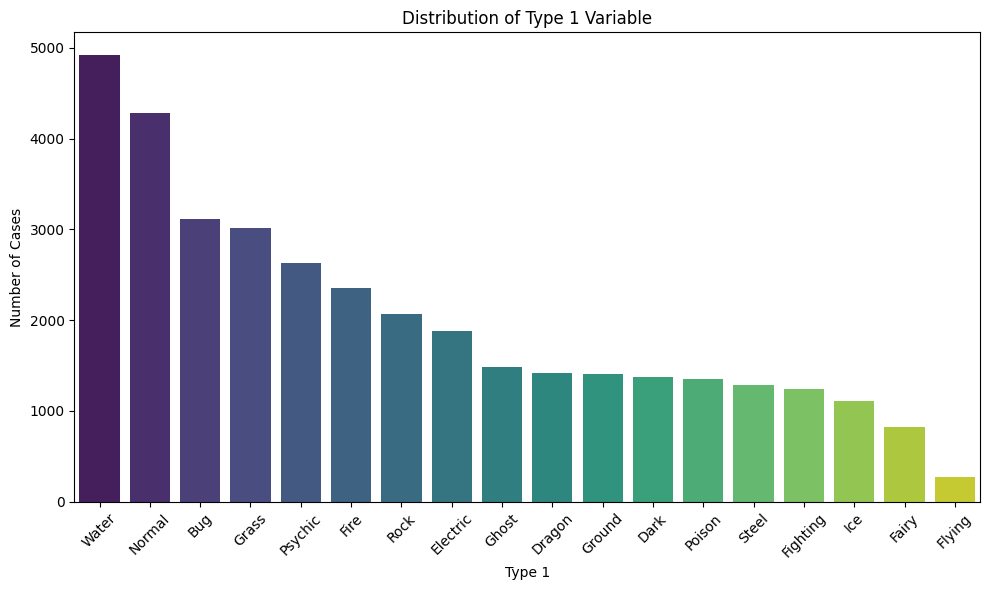

In [13]:
# Count the occurrences of each unique value in 'Type 1'
type1_counts = X['Type 1'].value_counts()
# Plotting the distribution using a grid bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=type1_counts.index, y=type1_counts.values, palette='viridis')
plt.title('Distribution of Type 1 Variable')
plt.xlabel('Type 1')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

3. Determine which of the features have missing values. How many missing values there are for each one?

In [14]:
# Find columns with missing values and their respective counts
missing_values = X.isnull().sum()

# Filter columns/features with missing values (non-zero counts)
features_with_missing_values = missing_values[missing_values > 0]

print("Features with missing values:")
print(features_with_missing_values)

Features with missing values:
Name                  3994
Type 1                3974
Type 2               20535
HP                    4006
Attack                3897
Defense               4034
Sp. Atk               3920
Sp. Def               3982
Speed                 3972
Generation            3993
Legendary             3981
Name__other           3963
Type 1__other         4010
Type 2__other        20594
HP__other             4105
Attack__other         3995
Defense__other        4016
Sp. Atk__other        4096
Sp. Def__other        4005
Speed__other          4044
Generation__other     3986
Legendary__other      3982
dtype: int64


4. Analize the distribution of the target column. Is it balanced?

C:\Users\jbarbera\AppData\Local\Temp\ipykernel_9512\1601608488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_value_counts.index, y=wins_value_counts.values, palette='viridis')


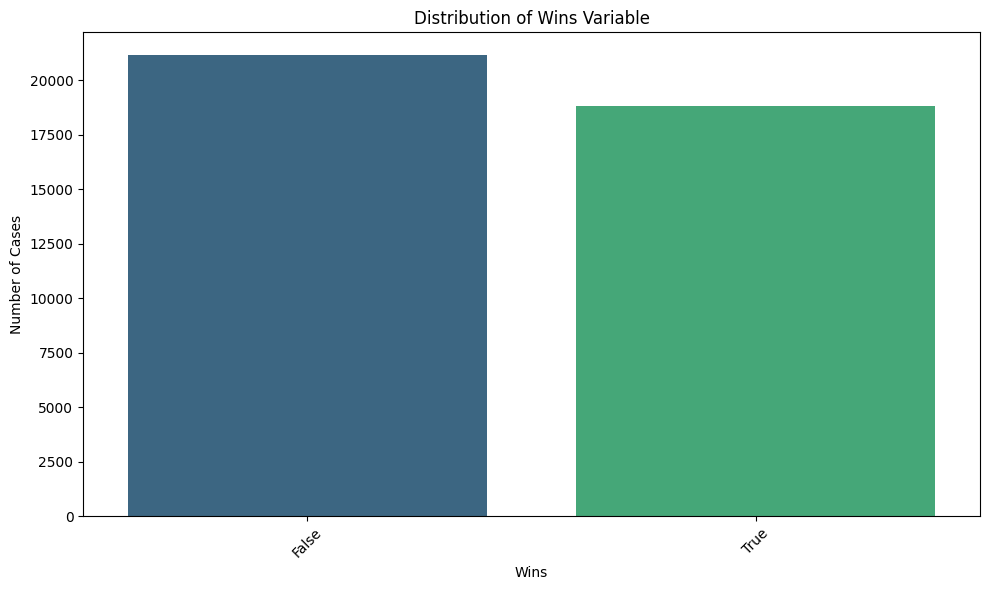

In [15]:
# Looking at the plot of all the samples, we can see that is mostly balanced, they only have a difference of 2.403 samples.
wins_value_counts = y.value_counts() 
# Plotting the distribution using a grid bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=wins_value_counts.index, y=wins_value_counts.values, palette='viridis')
plt.title('Distribution of Wins Variable')
plt.xlabel('Wins')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Part 2 - Preprocess the data (3 points)
Once we know how the dataset is, we can proceed with the cleaning of the data. This includes:

- Select the features that you want to use (p.e. removing too specific features). Explain why each feature is used or discarded.



In [16]:
""" All these features are being discarded because, in a fight, you don't need to consider them to win. """
columns_to_drop = ['Legendary', 'Legendary__other', 'Name', 'Name__other','Generation','Generation__other']
used_features = X.drop(columns=columns_to_drop, axis=1)
""" The other ones are being used because some are physical statistics like HP, Speed, Attack, Defense, Sp. Attack, and Sp. Def, and others (Type 1 and Type 2) need to be considered to know when a pokemon could be more useful against others. """

' The other ones are being used because some are physical statistics like HP, Speed, Attack, Defense, Sp. Attack, and Sp. Def, and others (Type 1 and Type 2) need to be considered to know when a pokemon could be more useful against others. '

- Impute the missing values. Explain why you use this imputer and not another one. If you use different imputers for different features, explain the reason why you do this.

In [19]:
""" To impute the missing values, we choose the Scikit-Learn 'SimpleImputer', which is really useful because, apart from the imputer, the machine learning framework provides feature transformation, data manipulation, pipelines, and machine learning algorithms.
All of them integrate smoothly. First of all, we wanted to see which columns had more missing values. We can see that the Type 2 and Type 2__other columns are the ones that have the most Na values—half of them, to be precise. The other ones have more or less 10%.
But we also know that there are possibilities that a Pokemon doesn't have a second type, so we won't be imputing these two columns (Type 2 and Type 2__other)."""
NA = pd.DataFrame(data=[used_features.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (used_features.isna().sum()/used_features.shape[0]*100).tolist()]], 
           columns=used_features.columns, index=['NA Count', 'NA Percent']).transpose()
NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

""" First of all, we will start imputing the categorical columns, so we will drop the two columns mentioned above and select only the object-type columns. """
categorical_features_to_impute = used_features.drop(['Type 2','Type 2__other'], axis=1).select_dtypes(include=['object']).columns.tolist()

""" Then we will use the SimpleImputer with the most_frequent strategy because the are categorical."""
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
used_features[categorical_features_to_impute] = imputer.fit_transform(used_features[categorical_features_to_impute])

""" And as we can see the aren't more Na values on these columns """
NA = pd.DataFrame(data=[used_features.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (used_features.isna().sum()/used_features.shape[0]*100).tolist()]], 
           columns=used_features.columns, index=['NA Count', 'NA Percent']).transpose()
NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

""" We will start imputing the numeric columns, so we will select only the float64 columns; in this case, we don't want to drop any column. """
numeric_features_to_impute = used_features.select_dtypes(include=['float64']).columns.tolist()

""" Then we will use the SimpleImputer with the mean strategy because they are numeric."""
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
used_features[numeric_features_to_impute] = imputer.fit_transform(used_features[numeric_features_to_impute])

""" And as we can see the aren't more Na values on these columns """
NA = pd.DataFrame(data=[used_features.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (used_features.isna().sum()/used_features.shape[0]*100).tolist()]], 
           columns=used_features.columns, index=['NA Count', 'NA Percent']).transpose()
NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
Type 1,0,0.00%
Type 2,20535,51.34%
HP,0,0.00%
Attack,0,0.00%
Defense,0,0.00%
Sp. Atk,0,0.00%
Sp. Def,0,0.00%
Speed,0,0.00%
Type 1__other,0,0.00%
Type 2__other,20594,51.48%


- Encode the values of the features to work with the model you choose. This can be either encoding the categorical values, or discretizing continuous values.

In [20]:
""" We decided to encode the categorical values, because there are less than continous. """
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_features_to_encode = used_features.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features_to_encode:
    used_features[col] = label_encoder.fit_transform(used_features[col])

## Part 3 - Training your model (3 points)
In this part you have to train a **classifier** model to predict if a Pokemon will win or not a battle against another Pokemon. For this, you should explore at least 3 different classifiers.

You have to train and evaluate those classifiers using cross-validation in order to select the best one. Then, you should also study the results of the model (overfit, underfit, possible bias...).

1. Train (at least) 3 different classifiers
2. Evaluate the 3 classifiers using cross-validation. Select the best model according to this metric.


In [21]:
""" We decided to train these 3 different classifiers:"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score

""" First we decided to train and try one of the most common, the DecisionTreeClassifier"""
DT_clf = DecisionTreeClassifier(random_state=42)
DT_scores = cross_val_score(DT_clf,used_features,y, cv=10)

""" We decided to trian and try the RandomForestClassifier """
RF_clf = RandomForestClassifier(random_state=42)
RF_scores = cross_val_score(RF_clf,used_features,y,cv=10)

""" Last but not least, we decided to train and try the MLPClassifier """
MLPC_clf = MLPClassifier(random_state=42)
MLPC_scores = cross_val_score(MLPC_clf,used_features,y,cv=10)

""" As we can see in the next results, after doing the cross-validation evaluation, the best model according to the mean of the scores is RandomForest, which will be the one we choose."""
print(DT_scores.mean())
print(RF_scores.mean())
print(MLPC_scores.mean())


0.7822
0.8522000000000001
0.834


3. For the selected model: 
   1. Get the accuracy for data not seen during the training process
   2. Plot the confusion matrix
   3. Analize the results of accuracy and the confusion matrix

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DT_clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(used_features, y, test_size=0.2, random_state=42)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

## Part 4 (Optional) - Create an ensemble and configure the model

You have trained different classifiers but selected only one of them as "the best" one. Maybe instead of having the models competing between them, having them to colaborate would yield better results. 

We propose you to create an ensemble of the different classifiers explored in *Part 3*. You should compare the ensemble with the individual models using cross-validation, and then get the final accuracy and the confusion matrix for the ensemble.
As a bonus, try to tune the parameters of this ensemble using either `GridSearchCV` or `RandomizedSearchCV`.

1. Train an ensemble with the classifiers in *Part 3*.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(used_features, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# Create a voting classifier with the individual classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('mlp_classifier', mlp_classifier)
], voting='hard')

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('mlp_classifier',
                              MLPClassifier(max_iter=1000, random_state=42))])

2. Compare the performance of this ensemble using cross-validation, the final accuracy, and the confusion matrix. Analyze the results.

Cross-validation scores: 0.8447749999999999
Final Accuracy: 0.8494


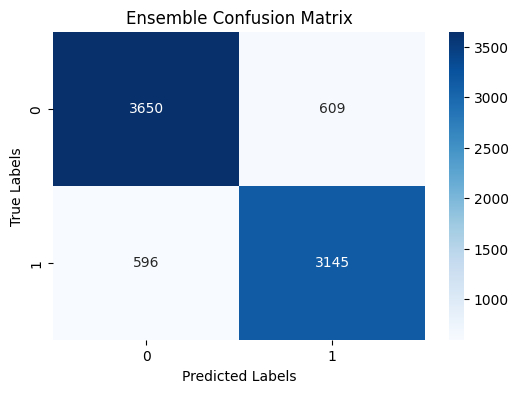

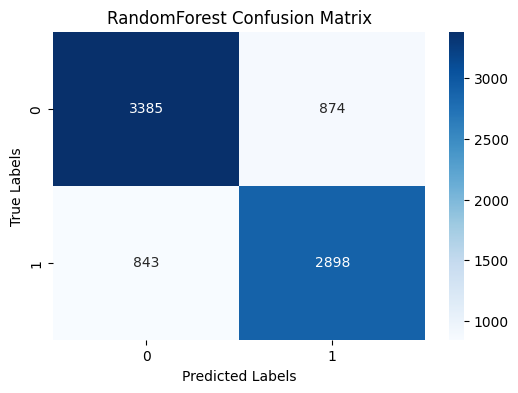

' We can see there is a clear difference between the prediction results; the ensemble had a 0.85 accuracy and the RandomForestClassifier had a 0.78 accuracy,\n which in this context could win or lose a fight. We can also see a difference on the confusion matrix, where the ensemble predicted 300 more correct samples. '

In [25]:
from sklearn.metrics import confusion_matrix

# Calculate cross-validation scores
cross_val_scores = cross_val_score(ensemble_classifier, used_features, y, cv=5)

# Predict using the ensemble classifier
ensemble_predictions = ensemble_classifier.predict(X_test)

# Calculate final accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print(f"Cross-validation scores: {cross_val_scores.mean()}")
print(f"Final Accuracy: {ensemble_accuracy:.4f}")

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Resulsts using just the RandomForestClassifier
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

""" We can see there is a clear difference between the prediction results; the ensemble had a 0.85 accuracy and the RandomForestClassifier had a 0.78 accuracy,
 which in this context could win or lose a fight. We can also see a difference on the confusion matrix, where the ensemble predicted 300 more correct samples. """

3. Fine-tune the hyper-parameters of the ensemble using `GridSearchCV` or `RandomizedSearchCV`.

In [26]:
""" We fine-tuned the hyper-parameters with the GridSearchCV instead of the RandomizedSearchCV, with 5-fold cross-validation 
for evaluating each combination of hyperparameters. """
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(used_features, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Create a voting classifier with the individual classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('mlp_classifier', mlp_classifier)
], voting='hard')

# Define the hyperparameter grid for each classifier
param_grid = {
    'decision_tree__max_depth': [3, 5, 7],
    'random_forest__n_estimators': [50, 100, 150],
    'mlp_classifier__hidden_layer_sizes': [(50,), (100,), (150,)]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=ensemble_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model on the test set using the best estimator from GridSearchCV
best_ensemble = grid_search.best_estimator_
y_pred = best_ensemble.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy using Best Estimator:", test_accuracy)

Best Parameters: {'decision_tree__max_depth': 7, 'mlp_classifier__hidden_layer_sizes': (150,), 'random_forest__n_estimators': 150}
Best Accuracy: 0.8472500000000001
Test Accuracy using Best Estimator: 0.85025


## Part 5 - Wrap-up (2 points)
The final part of this assignment is to wrap-up your classifier into a pipeline. This pipeline will execute the entire process:

- Preprocess the data
    - Select features
    - Impute data
    - Encode values
- The classifier selected in *Part 3* (or the ensemble if it is better)

This pipeline will be used in the other provided notebook to generate the predictions for the combats you have to submit.

To ensure everything works as expected, we recommend you to load the dataset again before using it with the pipeline. You should also compare the accuracy and the confusion matrix from the pipeline with the model trained before. **Remember to set the random state to all the required transformers and estimators to have a constant output**.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path
import pandas

__wd__ = Path("__file__").resolve().parent

datasets_path = __wd__ / "datasets"

data = pandas.read_csv(datasets_path / "data.train", index_col=0)
inverse_data = pandas.read_csv(datasets_path / "data_inverse.train", index_col=0)

def get_Xy(dataset):
    return dataset.drop("Wins", axis=1), dataset["Wins"]

X, y = get_Xy(data)

columns_to_drop = ['Legendary', 'Legendary__other', 'Name', 'Name__other','Generation','Generation__other']
used_features = X.drop(columns=columns_to_drop, axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(used_features, y, test_size=0.2, random_state=42)

# Preprocessing steps
numeric_features = used_features.select_dtypes(include=['float64']).columns.tolist()
categorical_features = used_features.drop(['Type 2','Type 2__other'], axis=1).select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Initialize individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Create a voting classifier with the individual classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('mlp_classifier', mlp_classifier)
], voting='hard')

# Define the hyperparameter grid for each classifier
param_grid = {
    'classifier__decision_tree__max_depth': [3, 5, 7],
    'classifier__random_forest__n_estimators': [50, 100, 150],
    'classifier__mlp_classifier__hidden_layer_sizes': [(50,), (100,), (150,)]
}

# Create a pipeline with preprocessing and ensemble classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ensemble_classifier)
])

# Perform GridSearchCV for hyperparameter tuning within the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model on the test set using the best estimator from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy using Best Estimator:", test_accuracy)


Best Parameters: {'classifier__decision_tree__max_depth': 7, 'classifier__mlp_classifier__hidden_layer_sizes': (150,), 'classifier__random_forest__n_estimators': 150}
Best Accuracy: 0.84653125
Test Accuracy using Best Estimator: 0.8505


In [22]:
import joblib
# Importing the pipeline best model
joblib.dump(best_model, 'pipeline.pkl')

['pipeline.pkl']

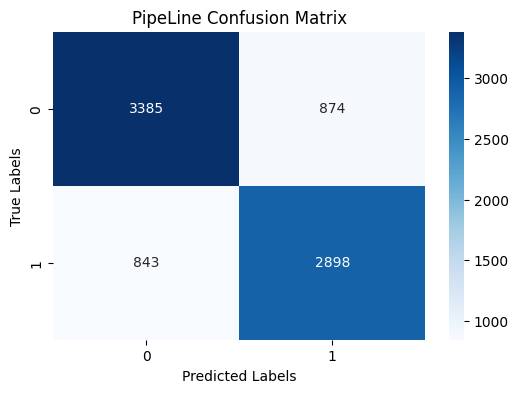

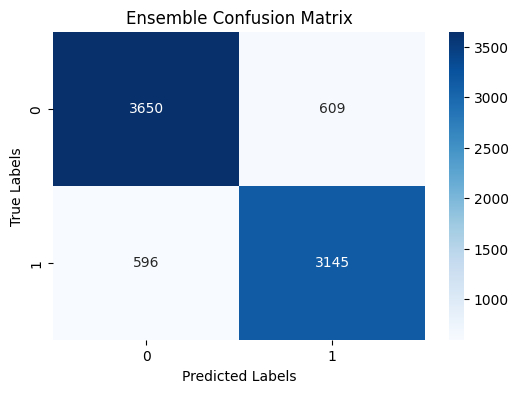

In [26]:
# Resulsts using just the RandomForestClassifier
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('PipeLine Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

conf_matrix = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()